# 情感分析
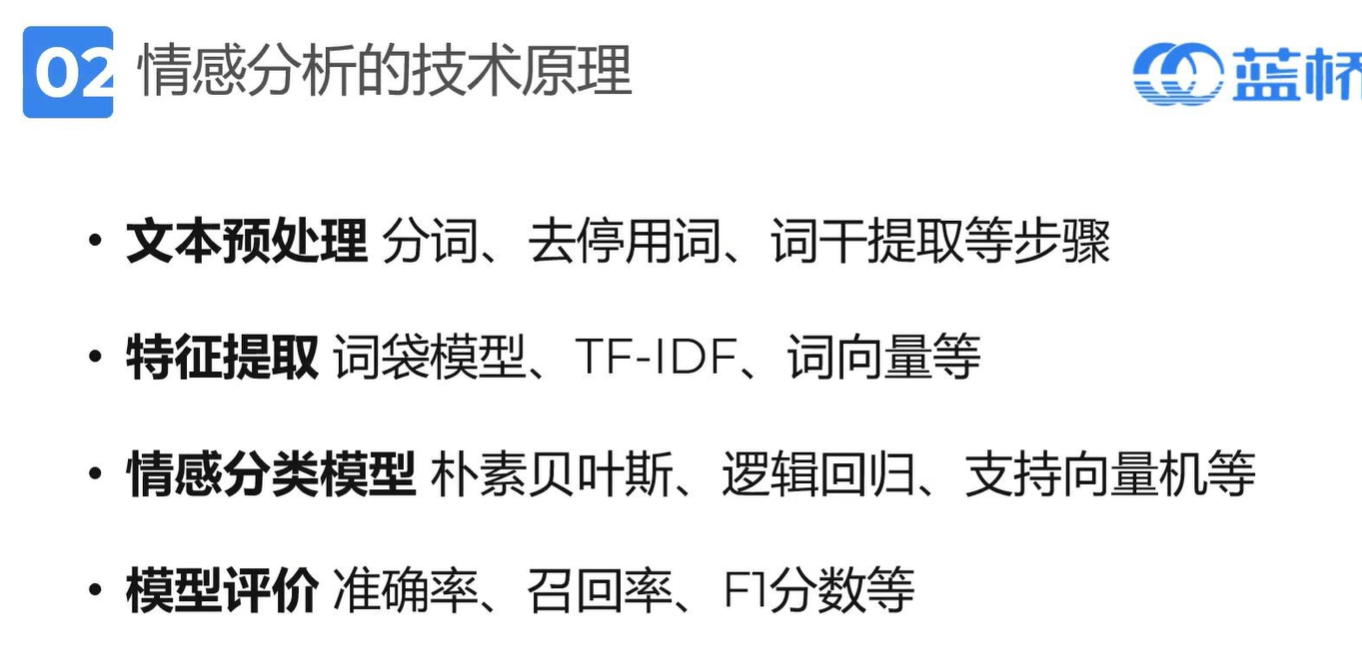
难题：网址链接
https://www.lanqiao.cn/courses/40981/learning/?id=2813917&compatibility=false

### !多使用 help( )查看方法
<mark>ERROR</mark>: 
* 为各个字符串之间添加 ‘ ’空格  ‘ ’.join(有字符串构成的列表)
* jieba 的cut 返回分词列表 与 lcut返回一个生成器对象
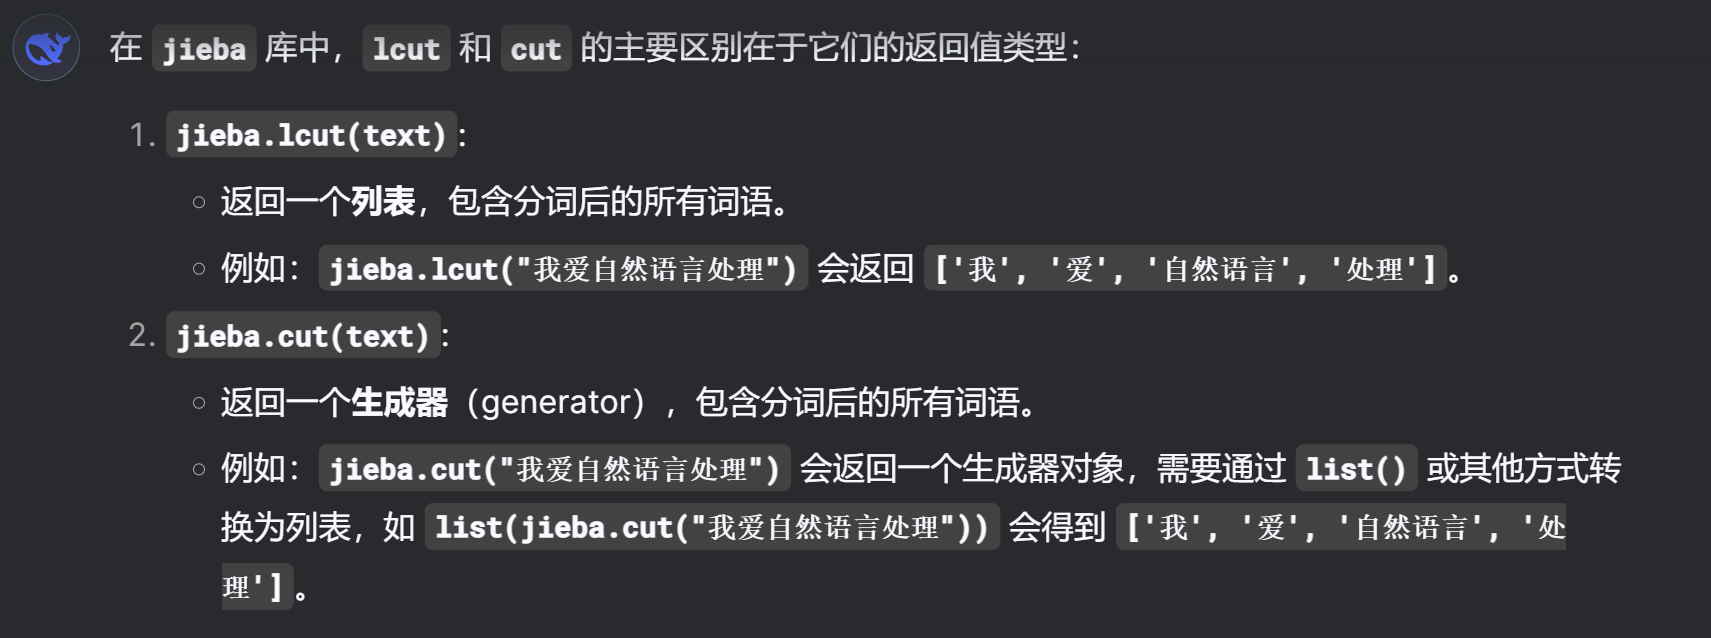
* sklearn 的 fit 简答直接训练 与fit_transform 在fit的基础上结合了新方法
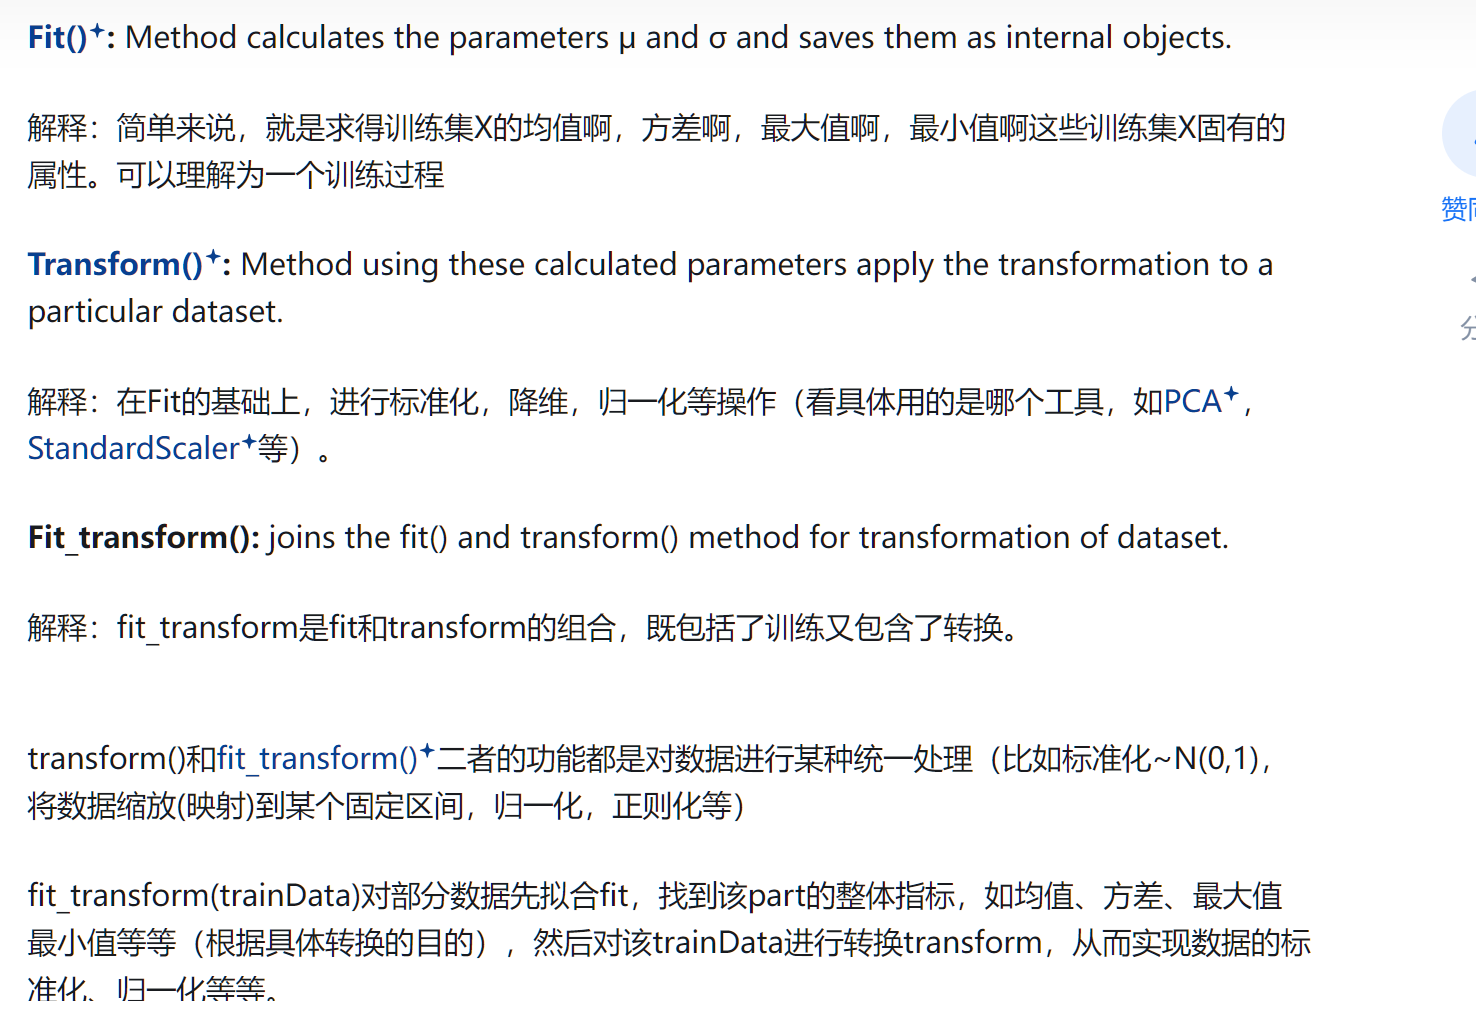
https://zhuanlan.zhihu.com/p/271969151
* 将模型写为二进制文件 建议使用 pickle.dump 注意是二进制 wb
* 将模型读取 使用pickle.load 二进制 rb

* 使用sklearn 的accuracy_score 
```
>>> from sklearn.metrics import accuracy_score
    >>> y_pred = [0, 2, 1, 3]
    >>> y_true = [0, 1, 2, 3]
    >>> accuracy_score(y_true, y_pred)
```


```python
写~
model = LogisticRegression()
    model.fit(x, y) 

    with open(classifier_path,'wb') as file:
        pickle.dump(model, file)
读~
    with open(classifier_path, 'rb') as file:
        trained_model = pickle.load(file)
output = trained_model.predict(x_test)
```

---

# 手打答案
```python
import jieba
import pandas as pd
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

def load_dataset(file_path):
    x, y = [], [] 
    with open(file_path, "r", encoding='utf-8') as f:
        for i in f.readlines():
            i_list = i.strip().split(",")
            x.append(i_list[2]) 
            y.append(int(i_list[1]))
    return x, y

def preprocess_text(text):
    words = jieba.lcut(text) 
    processed_text = " ".join(words)
    return processed_text

def fit_classifier(x, y, classifier_path='./classifier_model.pkl'):
    model = LogisticRegression()
    model.fit(x, y) 

    with open(classifier_path,'wb') as file:
        pickle.dump(model, file)


def test_classifier(test_x, test_y, classifier_path='./classifier_model.pkl'):
    with open(classifier_path, 'rb') as file:
        trained_model = pickle.load(file)
    output = trained_model.predict(test_x)
    accuracy = accuracy_score(test_y, output)

    return accuracy

def main():
    train_x, train_y = load_dataset('sentiment_analysis_train.txt')
    test_x, test_y = load_dataset('sentiment_analysis_test.txt')
    train_x = [preprocess_text(text) for text in train_x]
    test_x = [preprocess_text(text) for text in test_x]

    vectorizer = TfidfVectorizer(max_features=1000)
    train_x_features = vectorizer.fit_transform(train_x)
    test_x_features = vectorizer.transform(test_x)

    fit_classifier(train_x_features, train_y)
    acc = test_classifier(test_x_features, test_y)
    print("Accuracy:", acc)

if __name__ == '__main__':
    main()
```
---
# 参考答案
```python
import jieba
import pandas as pd
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

def load_dataset(file_path):
    x, y = [], [] 
    with open(file_path, "r", encoding='utf-8') as f:
        for i in f.readlines():
            i_list = i.strip().split(",")
            x.append(i_list[2]) 
            y.append(int(i_list[1]))
    return x, y

def preprocess_text(text):
    words = jieba.lcut(text) 
    processed_text = " ".join(words)
    return processed_text

def fit_classifier(x, y, classifier_path='./classifier_model.pkl'):
    classifier = MultinomialNB()
    classifier.fit(x, y)
    with open(classifier_path, 'wb') as file:
        pickle.dump(classifier, file)

def test_classifier(test_x, test_y, classifier_path='./classifier_model.pkl'):
    with open(classifier_path, 'rb') as file:
        classifier = pickle.load(file)
    predictions = classifier.predict(test_x)
    accuracy = accuracy_score(test_y, predictions)
    return accuracy

def main():
    train_x, train_y = load_dataset('sentiment_analysis_train.txt')
    test_x, test_y = load_dataset('sentiment_analysis_test.txt')
    train_x = [preprocess_text(text) for text in train_x]
    test_x = [preprocess_text(text) for text in test_x]

    vectorizer = TfidfVectorizer(max_features=1000)
    train_x_features = vectorizer.fit_transform(train_x)
    test_x_features = vectorizer.transform(test_x)

    fit_classifier(train_x_features, train_y)
    acc = test_classifier(test_x_features, test_y)
    print("Accuracy:", acc)

if __name__ == '__main__':
    main()
```